In [127]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [261]:
#Import the data and remove rows containing NAN values
df=pd.read_csv("../../Data/Harian/Rata Harian.csv").iloc[:,2]

#get data from 15 latest months
df=df[-(30*15):]

In [262]:
#Rescale the data to the range of 0-to-1
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df.values.reshape(-1,1))

In [263]:
#train test split; train 12 months, 3 months for testing
train=df[:30*12]; test=df[30*12:]

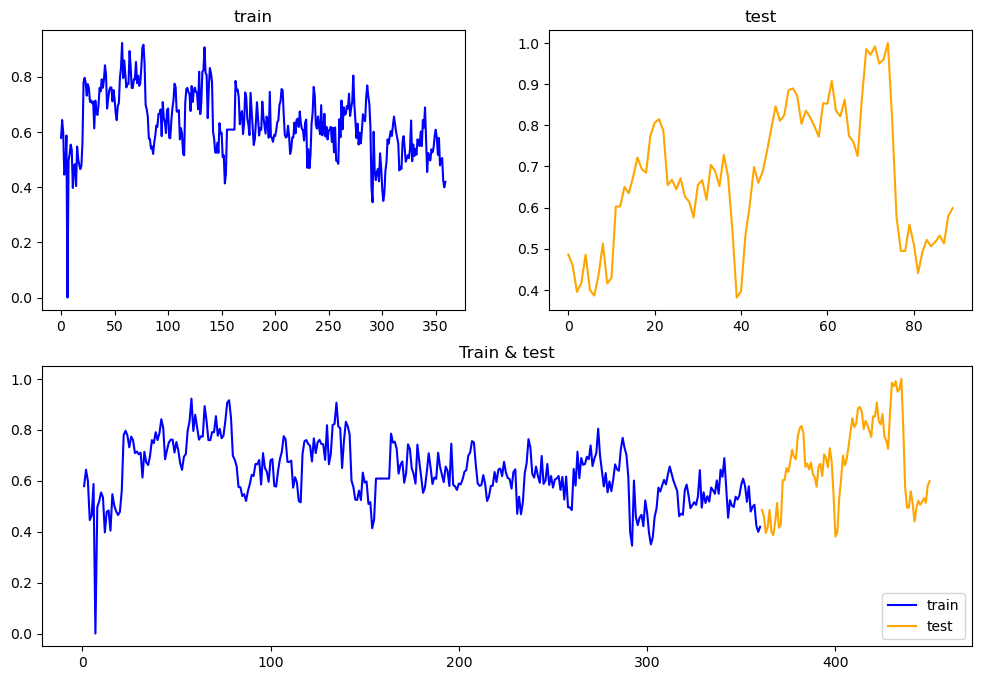

In [264]:
#plotting train, test and both
def plottraintest():
    fig =plt.figure(figsize=(12,8))
    ax=fig.add_subplot(2,2,1)
    ax.plot(train, c="blue")
    ax.set_title("train")
    ax=fig.add_subplot(2,2,2)
    ax.plot(test, c="orange")
    ax.set_title("test")
    ax=fig.add_subplot(2,1,2)
    temp=np.array(list(map(list, zip(train.flatten(), range(1,len(train)+1)))))
    ax.plot(temp[:,1], temp[:,0], c="blue", label="train")
    temp=np.array(list(map(list, zip(test.flatten(), range(len(train)+1,len(train)+len(test)+1)))))
    ax.plot(temp[:,1], temp[:,0], c="orange", label="test")
    ax.legend(loc="lower right")
    ax.set_title("Train & test")
plottraintest()

In [282]:
# reshape into X=t and Y=t+1

def lag(dataset, t=1):
    '''Default t=1'''
    dataX, dataY = [], []
    for i in range(len(dataset)-t-1):
        a = dataset[i:(i+t), 0]
        dataX.append(a)
        dataY.append(dataset[i + t, 0])
    return np.array(dataX), np.array(dataY)

t=10
trainX, trainY = lag(train)
testX, testY = lag(test)

In [283]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [284]:
#create model
def getmodel_compile():
    model=keras.Sequential([
        keras.layers.LSTM(4,  return_sequences = True, input_shape=(1, t)),           #4 hidden layer will be great for test, i guess?
        keras.layers.LSTM(16, return_sequences = True),
        keras.layers.LSTM(32),
        keras.layers.Dense(1)])                             #regression
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=keras.metrics.RootMeanSquaredError())
    return model

In [285]:
model=getmodel_compile()
model.fit(trainX, trainY, epochs=100, validation_data=(testX, testY), batch_size=32, verbose=1)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Rhey\miniconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_22" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_61" is incompatible with the layer: expected shape=(None, None, 10), found shape=(None, 1, 1)
    
    Call arguments received by layer "sequential_22" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 1, 1), dtype=float32)
      • training=True
      • mask=None


In [235]:
#Lets predict and check performance metrics
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

3/3 [==============================] - 0s 4ms/step


In [236]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [237]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(trainY, train_predict))

188.4028284442181

In [238]:
#Test Data RMSE
math.sqrt(mean_squared_error(testY, test_predict))

191.76967548446524

In [256]:
#Plotting
#Shift train prediction for plotting
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[t:len(train_predict) + t, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (t * 2)+1:len(df) - 1, :] = test_predict


#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (88,1) into shape (70,1)

In [243]:
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan

In [248]:
testPredictPlot[len(train_predict) + (t * 2)+1:len(df) - 1, :]

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

Predict the next 30 days Stock Price

In [193]:
x_input = testX[-100:].reshape(1,-1)
x_input.shape

(1, 88)

In [194]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [195]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

ValueError: cannot reshape array of size 88 into shape (1,100,1)

In [115]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [116]:
df3 = df_close.tolist()
df3.extend(lst_output)

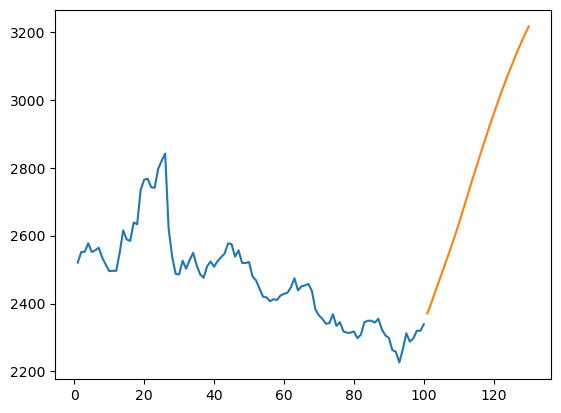

In [118]:
plt.plot(day_new, scaler.inverse_transform(df_close[-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

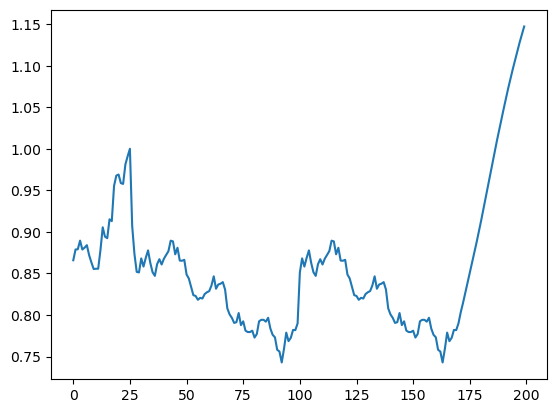

In [124]:
plt.plot(np.append(temp, x_input))